In [38]:
import pandas as pd

df = pd.read_csv('../SDCoutput.csv')
data = df['Values']
print(len(data))

2874


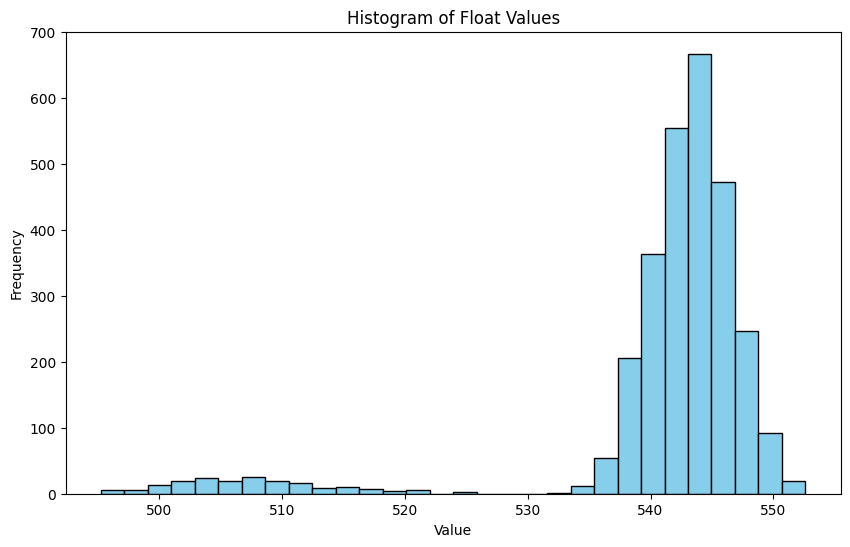

In [39]:
import matplotlib.pyplot as plt
import numpy as np
# Example data: Replace this with your actual data


plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Float Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


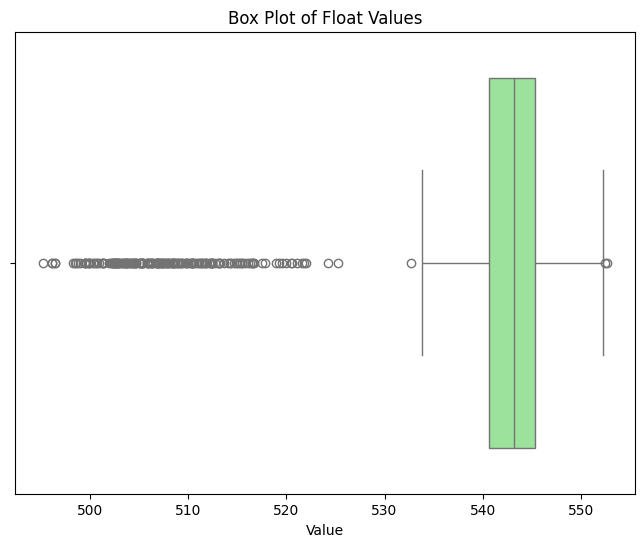

In [40]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=data, color='lightgreen')
plt.title('Box Plot of Float Values')
plt.xlabel('Value')
plt.show()

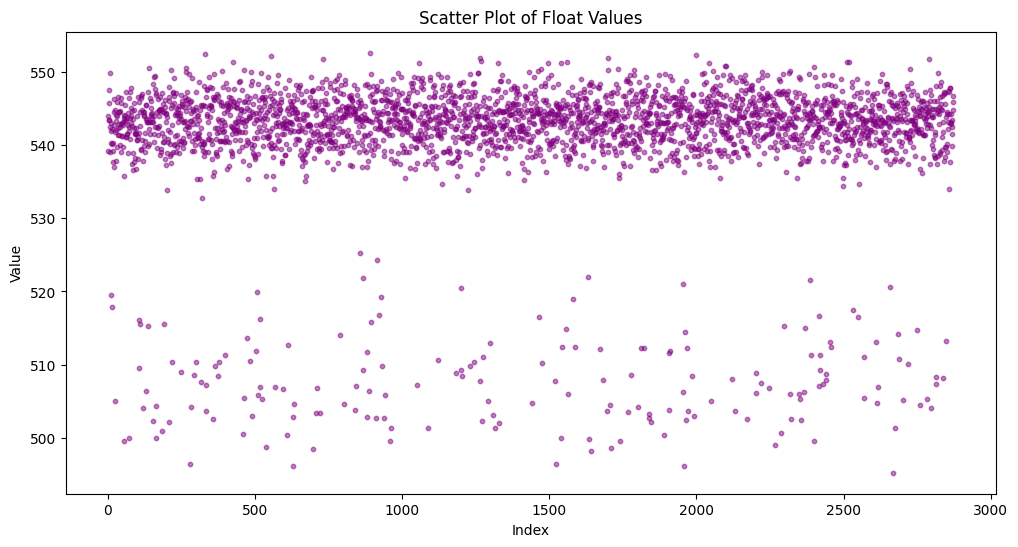

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(data)), data, alpha=0.5, s=10, color='purple')
plt.title('Scatter Plot of Float Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


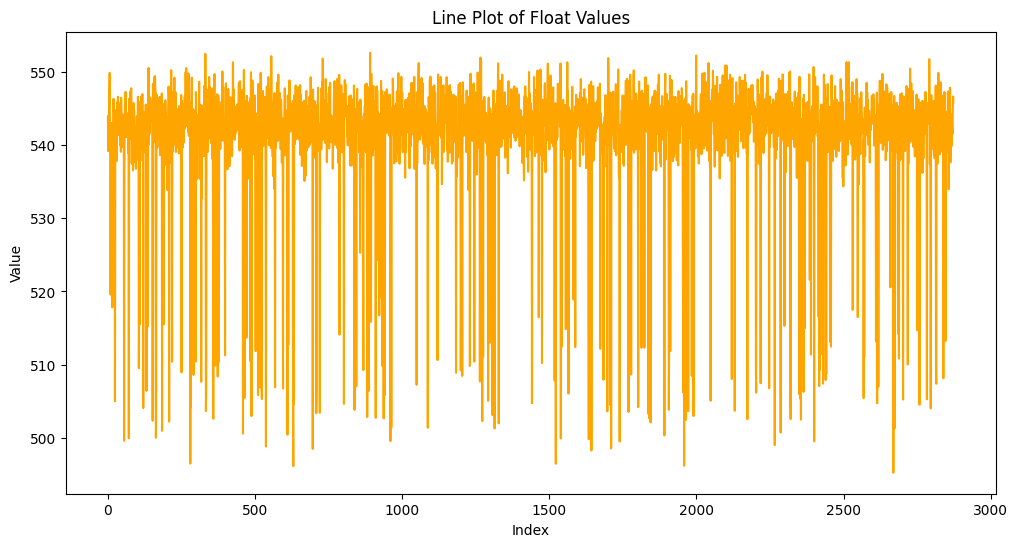

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(data, color='orange')
plt.title('Line Plot of Float Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


/tmp/ipykernel_16078/1417345004.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='red')


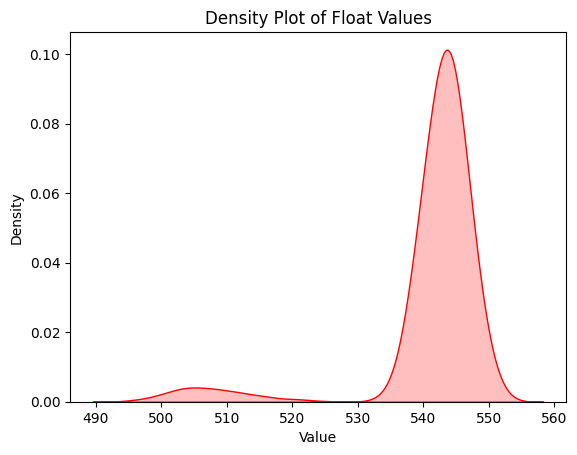

In [43]:
sns.kdeplot(data, shade=True, color='red')
plt.title('Density Plot of Float Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


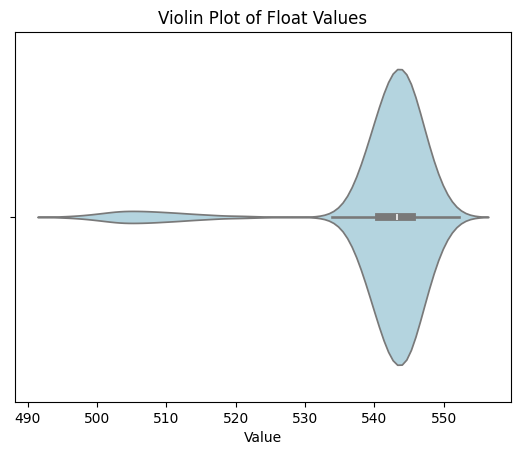

In [44]:
sns.violinplot(x=data, color='lightblue')
plt.title('Violin Plot of Float Values')
plt.xlabel('Value')
plt.show()


In [46]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models

# Step 1: Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Step 2: Load Pretrained ResNet18
model = models.resnet18(pretrained=True)
model = model.to(device)

# Since we are not training, set the model to evaluation mode
model.eval()

# Step 3: Load SVHN Dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-18 expects 224x224 inputs
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize as per ImageNet pretraining
])

# Download SVHN dataset (test split)
svhn_testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(svhn_testset, batch_size=32, shuffle=False, num_workers=2)

# Step 4: Inference and accuracy calculation
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Get predictions
        _, preds = torch.max(outputs, 1)

        # Calculate total and correct predictions
        total += labels.size(0)
        correct += (preds == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the SVHN test set: {accuracy:.2f}%')


Using downloaded and verified file: ./data/test_32x32.mat
Accuracy of the model on the SVHN test set: 0.00%
